In [19]:
import numpy as np

import torch
import torch.optim as optim
from torch.utils.data import DataLoader

from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Prepare train and test data
batch_size = 5000

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.5, 0.5, 0.5))
])

trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


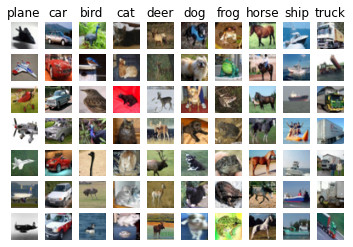

In [26]:
# constant for classes
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_classes = len(classes)
samples_per_class = 7
for label, cls in enumerate(classes):
    y_i = [j for j, bol in enumerate(trainset.targets[:1000]) if bol == label]
    for i in range(samples_per_class):        
        image = trainset.data[y_i[i]]
        plt_idx = i * num_classes + label + 1  # calculate plot location in the grid
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(image.astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)  # plot class names above columns
plt.show()

In [31]:
print('train set')
for label, cls in enumerate(classes):
    y_i = [j for j, bol in enumerate(trainset.targets) if bol == label]
    print('{} :{:}'.format(cls, len(y_i)))

print('\ntest set')
for label, cls in enumerate(classes):
    y_i = [j for j, bol in enumerate(testset.targets) if bol == label]
    print('{} :{:}'.format(cls, len(y_i)))    


train set
plane :5000
car :5000
bird :5000
cat :5000
deer :5000
dog :5000
frog :5000
horse :5000
ship :5000
truck :5000

test set
plane :1000
car :1000
bird :1000
cat :1000
deer :1000
dog :1000
frog :1000
horse :1000
ship :1000
truck :1000
